 ## Análise Exploratória

 #### Questões a serem respondidas:
 
1. Quantos registros válidos há e qual o total de aprovados e reprovados?
2. Qual a faixa etária com maior média de aprovação de crédito?
3. Quais a principais caracteristicas dos grupos de crédito (aprovado, reprovado)?
4. Percentil da renda entre os grupos de crédito (aprovado, reprovado)?
5. Ter carteira de motorista influencia na liberação de crédito?
6. Qual a relação  de creditos aprovados e reprovados entre os diferentes tipos de Cidadania?
7. Entre pessoas com menos de 1 ano empregadas, qual a relação entre pessoas que tirevam creditos aprovados e reprovados?
8. qual a média de score entre os creditos aprovados e reprovados?

In [594]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

sns.set_theme(style = "whitegrid")
name_file = 'dataset.csv'

### Funções

In [595]:
def getDataFrame():
    if os.path.isfile(name_file):
        return pd.read_csv(name_file)
    else:
        raise TypeError('Arquivo não encontrado!')

def generate_graphic_1(self):
    results = [self.count_approved, self.count_rejected]
    labels = ["Aprovados {} ({:0.2f} %)".format(self.count_approved, self.percent_approved), "Reprovados {} ({:0.2f} %)".format(self.count_rejected, self.percent_rejected)]
    plt.figure(figsize=(3,3))
    plt.pie(results, labeldistance=1, radius=3, wedgeprops=dict(width=0.8))
    plt.legend(labels=labels, loc='center', prop={'size':12})
    plt.title("Total por Resultado", loc='Center', fontdict={'fontsize':20, 'fontweight':20})
    plt.show()

def generate_range_age(df):
    ranges = [0, 18, 27, 35, 42, 60, 80, 110]
    labels = [
        'Underage',
        '18 to 27',
        '28 to 35',
        '36 to 42',
        '43 to 60',
        '61 to 80',
        '81 to 110'
    ]
    df_age = pd.DataFrame()
    df_age = pd.cut(x=df, bins=ranges, labels=labels)
    return df_age

def generate_range_years_emp(df):
    ranges = [0, 1, 3, 5, 10, 15, 25, 100]
    labels = [
        '< 1 year',
        '1 to 3',
        '4 to 5',
        '6 to 10',
        '10 to 15',
        '16 to 25',
        '> 25 years'
    ]
    df_years_emp = pd.DataFrame()
    df_years_emp = pd.cut(x=df, bins=ranges, labels=labels)
    return df_years_emp

def generate_range_income(df):
    values = list(df.unique())
    values.sort(reverse=False)
    ranges = [-1, 1000, 2500, 4000, 7000, 12000, 20000, 100000]
    labels = [
        '< 1k',
        '1k to 2.5k',
        '2.5k to 4k',
        '4k to 7k',
        '7k to 12k',
        '12k to 20k',
        '> 20k'
    ]
    df_income = pd.DataFrame()
    df_income = pd.cut(x=df, bins=ranges, labels=labels)
    return df_income

def add_label(plot):
    for i in plot.patches:
        plot.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
    
def generate_graphic_3(df_approved, df_rejected):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=False)
    fig.suptitle('Main Customer Characteristics')

    years_approved = pd.DataFrame()
    ranges_years = df_approved['YearsEmployed'].value_counts()
    years_approved['Years'] = ranges_years.index.categories.values
    years_approved['Occurrences'] = ranges_years.values
    plot1 = sns.barplot(ax=axes[0][0], x='Years', y='Occurrences', data=years_approved)
    axes[0][0].set_title("Years Employed per Range (Credit Approved)")
    add_label(plot1)
    

    years_rejected = pd.DataFrame()
    ranges_years = df_rejected['YearsEmployed'].value_counts()
    years_rejected['Years'] = ranges_years.index.categories.values
    years_rejected['Occurrences'] = ranges_years.values
    plot2 = sns.barplot(ax=axes[0][1], x='Years', y='Occurrences', data=years_rejected)
    axes[0][1].set_title("Years Employed per Range (Credit Rejected)")
    add_label(plot2)
    
    income_approved  = pd.DataFrame()
    income_ranges = df_approved['Income'].value_counts()
    income_approved['Ranges of Income'] = income_ranges.index.categories.values
    income_approved['Occurrences'] = income_ranges.values
    plot3 = sns.barplot(ax=axes[1][0], x='Ranges of Income', y='Occurrences', data=income_approved)
    axes[1][0].set_title("Income per Range (Credit Approved)")
    add_label(plot3)

    income_rejected = pd.DataFrame()
    income_ranges = df_rejected['Income'].value_counts()
    income_rejected['Ranges of Income'] = income_ranges.index.categories.values
    income_rejected['Occurrences'] = income_ranges.values
    plot4 = sns.barplot(ax=axes[1][1], x='Ranges of Income', y='Occurrences', data=income_rejected)
    axes[1][1].set_title("Income per Range (Credit Rejected)")
    add_label(plot4)

def lambda_boolean(df, name):
    return list(map(lambda x: True if x > 0 else False, df[name]))

def run_etl_df(df):
    df = df.drop(columns=['Industry', 'Ethnicity', 'PriorDefault', 'Citizen', 'ZipCode', 'Approved'])
    df['Gender'] = list(map(lambda x: "Female" if x == 0 else "Male", df['Gender']))
    df['Age'] = generate_range_age(df['Age'])
    df['Debt'] = lambda_boolean(df, 'Debt')
    df['Married'] = lambda_boolean(df, 'Married')
    df['BankCustomer'] = lambda_boolean(df, 'BankCustomer')
    df['Employed'] = lambda_boolean(df, 'Employed')
    df['DriversLicense'] = lambda_boolean(df, 'DriversLicense')
    df['YearsEmployed'] = generate_range_years_emp(df['YearsEmployed'])
    df['Income'] = generate_range_income(df['Income'])
    return df

### Classe Principal

In [610]:
class Analyze:
    def __init__(self):
        self.df = getDataFrame()
        self.df_approved = self.df[self.df['Approved'] == 1]
        self.df_rejected = self.df[self.df['Approved'] == 0]


    def check_na(self):
        print("Possui valores vazios: {}".format(self.df.isnull().values.any()))

    def answer_1(self):
        self.count_total = len(self.df)
        self.count_approved = len(self.df_approved)
        self.count_rejected = len(self.df_rejected)
        self.percent_rejected = (self.count_rejected / self.count_total) * 100
        self.percent_approved = (self.count_approved / self.count_total) * 100
        print("Total: {}\nAprovados {}\nReprovados {}".format(self.count_total, self.count_approved, self.count_rejected))
        generate_graphic_1(self)

    def answer_2(self):
        self.mean_age_approved = self.df_approved['Age'].mean()
        print('A idade com maior média de aprovação é de {} anos.'.format(int(self.mean_age_approved)))
        display(self.df_approved.describe())

    def answer_3(self):
        df_approved = run_etl_df(self.df_approved.copy())
        df_rejected = run_etl_df(self.df_rejected.copy())
        generate_graphic_3(df_approved, df_rejected)

    def answer_4(self):
        df_percentil_income = pd.DataFrame()
        list_percentil = [25,50,75,100]
        df_percentil_income['Percentil'] = list_percentil
        df_percentil_income['Income for Approved'] = np.percentile(a=self.df_approved['Income'], q=list_percentil)
        df_percentil_income['Income for  Rejected'] = np.percentile(a=self.df_rejected['Income'], q=list_percentil)
        print(df_percentil_income.head())
        



    def generate_answers(self):
        self.answer_1()
        self.answer_2()
        self.answer_3()
        self.answer_4()


analyze = Analyze()
#analyze.generate_answers()
analyze.answer_4()

   Percentil  Income for Approved  Income for  Rejected
0         25                  0.0                   0.0
1         50                221.0                   1.0
2         75               1209.0                  67.0
3        100             100000.0                5552.0


#### Test Units

In [597]:
from nose.tools import assert_raises

class TestUnits(object):

    def test_file_exist(self):
        analyze = Analyze()
        not assert_raises(TypeError, analyze)
        print('TEST - test_file_exist: OK!')

    def test_file_not_exist(self):
        analyze = Analyze()
        assert_raises(TypeError, analyze)
        print('TEST - test_file_not_exist: OK!')

def runTestUnits():
    test = TestUnits()
    test.test_file_exist()
    test.test_file_not_exist()

#### Main

TEST - test_file_exist: OK!
TEST - test_file_not_exist: OK!
Possui valores vazios: False
Total: 690
Aprovados 307
Reprovados 383


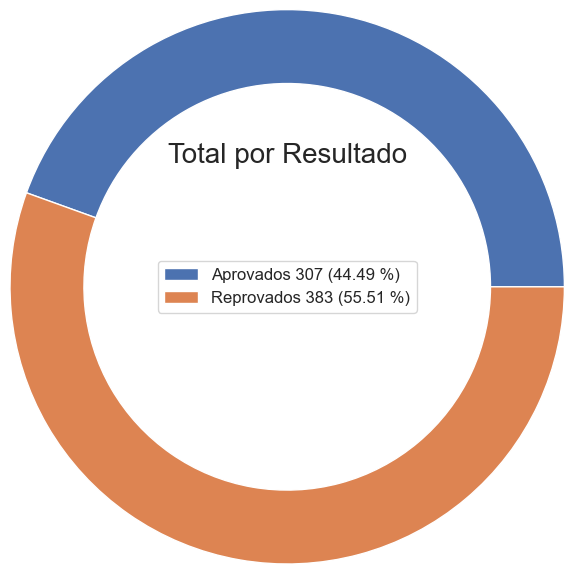

A idade com maior média de aprovação é de 33 anos.


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.0
mean,0.680782,33.686221,5.904951,0.846906,0.853420,3.427899,0.925081,0.680782,4.605863,0.475570,161.208469,2038.859935,1.0
std,0.466935,12.774745,5.471485,0.360666,0.354264,4.120792,0.263690,0.466935,6.320242,0.500218,161.791065,7659.763941,0.0
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,23.210000,1.500000,1.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,30.170000,4.460000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,117.000000,221.000000,1.0
75%,1.000000,41.330000,9.520000,1.000000,1.000000,5.000000,1.000000,1.000000,7.000000,1.000000,277.000000,1209.000000,1.0
max,1.000000,76.750000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.000000,1.000000,840.000000,100000.000000,1.0


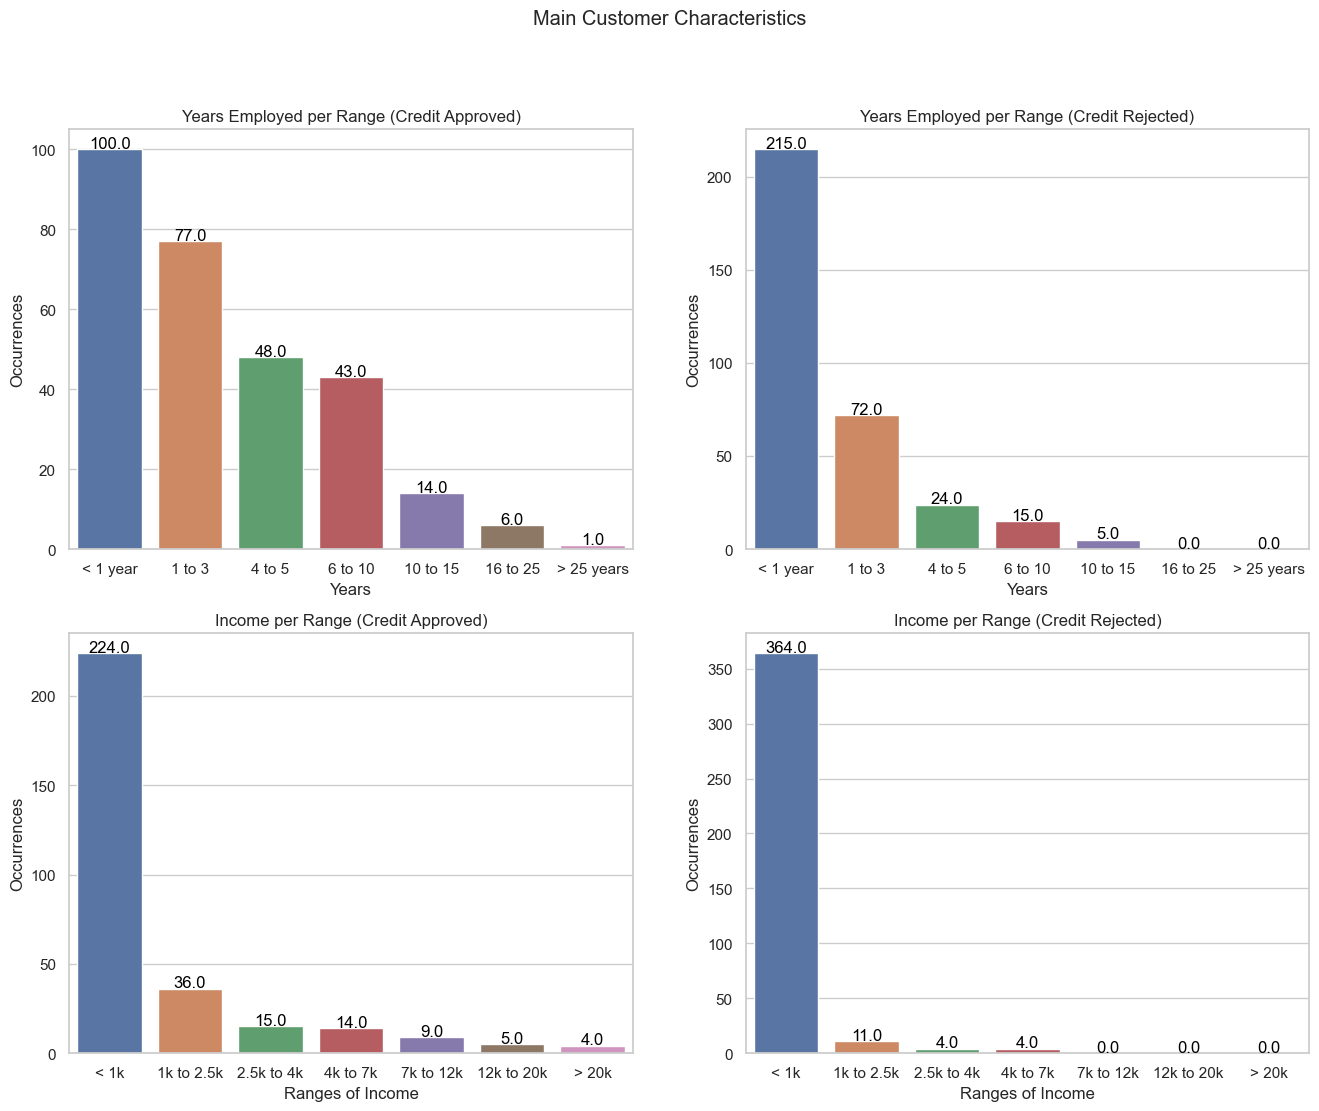

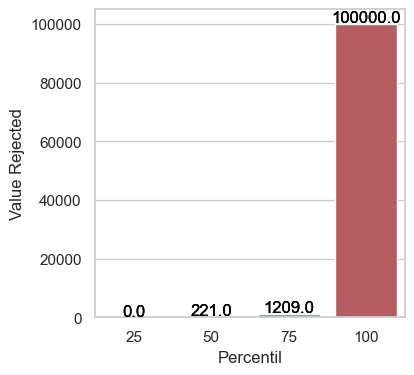

In [598]:
def main():
    runTestUnits()
    analyze = Analyze()
    analyze.check_na()
    analyze.generate_answers()
    

if __name__ == '__main__':
    main()

In [599]:
#df_full = pd.read_csv("dataset.csv")
#df = df_full.copy()

In [600]:
#df.head()

In [601]:
#df = df.drop(columns=["Ethnicity"])

In [602]:
#df['Citizen'].unique()

In [603]:
#Altera label da coluna Industry
#citizen_map = {'ByBirth':0, 'ByOtherMeans':1, 'Temporary':2}

In [604]:
#df['Citizen'] = df['Citizen'].map(citizen_map)
#df['Citizen']

In [605]:
#df.head()

In [606]:
#Altera label da coluna Industry
#label_names = df['Industry'].unique()
#index_labels = list(range(len(label_names)))
#df['Industry'] = df['Industry'].map(dict(zip(label_names, index_labels)))
#df['Industry']
